# More Bulldozer

Why did Bessie the cow give her dad a construction hat before bed? 

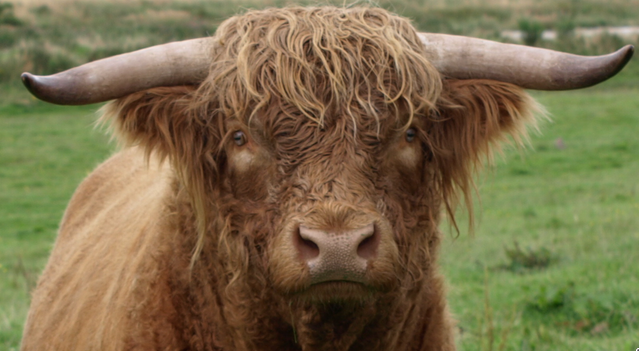

_Because he's a bull-dozer!_

It's time for more of the bulldozer challenge!

## What I've done so far

**Set Baseline**

In `tractors.ipynb`, I created a baseline model. Since my goal was to get an end-to-end training process working, I tried to choose simplicity of implementation over accuracy of results anytime the tradeoff was presented.

**Add Utility Functions**

I wrote a utility function called `get_kaggle_dataset` and put it in `util.py` because it seems like something I'll need to do again and again for every competition. 

**Simplify**

In the spirit of simplicity, I dropped all but a few columns from my dataset: `'SalesID', 'SalePrice', 'YearMade', 'saledate'`. 

Features are either continuous or categorical. For example,
- **Continuous** : Height (centimeters). 
- **Categorical** : US States 

Sometimes single features in the dataset should be broken into multiple simpler features so that models have enough structure to glom onto to find the most useful patterns. Dates are a great example.  I transformed `saledate` into a set of simpler date-related features using `add_datepart`:

```
from fastai.tabular.core import add_datepart
add_datepart(df, 'saledate', drop=True)
```

Thus `saledate` became:

- saleYear
- saleMonth
- saleWeek
- saleDay
- saleDayofweek
- saleDayofyear
- saleIs_month_end
- saleIs_month_start
- saleIs_quarter_end
- saleIs_quarter_start
- saleIs_year_end
- saleIs_year_start
- saleElapsed

**Clean**

(Without knowing whether this would make a positive difference on my results or not), I set the `YearMade` date of all the records that reported `YearMade == 1000` to 10 less than the minimum, and added a `YearMade_imputed` feature that flagged every row that I did this to.

```
df['YearMade_imputed'] = (df['YearMade'] == 1000).astype(int)
next_smallest_value = df[df['YearMade'] > 1000]['YearMade'].min()
df['YearMade'] = np.where(df['YearMade'] == 1000, next_smallest_value - 10, df['YearMade'])
```

**Inspect**

I "looked" at the data in a number of ways:
- I listed the categories
- I computed the correlation matrix of the numeric features
- I computed the number of unique entries for each category

**`Scikit-learn`**

I used functions from the `scikit-learn` library.

```
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
```

In [3]:
from util import get_kaggle_dataset
path = get_kaggle_dataset("bluebook-for-bulldozers")

import pandas as pd
df = pd.read_csv(path/f'TrainAndValid.csv', low_memory=False) 

In [4]:
sales_id = df["SalesID"]
df.columns.map(print)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
UsageBand
saledate
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


Index([None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None, None, None, None, None, None, None, None,
       None, None, None, None, None],
      dtype='object')

In [ ]:
from fastai.tabular.core import add_datepart
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error

df = df[['SalesID', 'SalePrice', 'YearMade', 'saledate']]
add_datepart(df, 'saledate', drop=True)
df['YearMade_imputed'] = (df['YearMade'] == 1000).astype(int)
next_smallest_value = df[df['YearMade'] > 1000]['YearMade'].min()
df['YearMade'] = np.where(df['YearMade'] == 1000, next_smallest_value - 10, df['YearMade'])
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

sales_id = df['SalesID']
df.drop('SalesID', axis=1)

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Split sales_id using the indices of X_val
salesID_val = sales_id[X_val.index]